[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
D:\anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


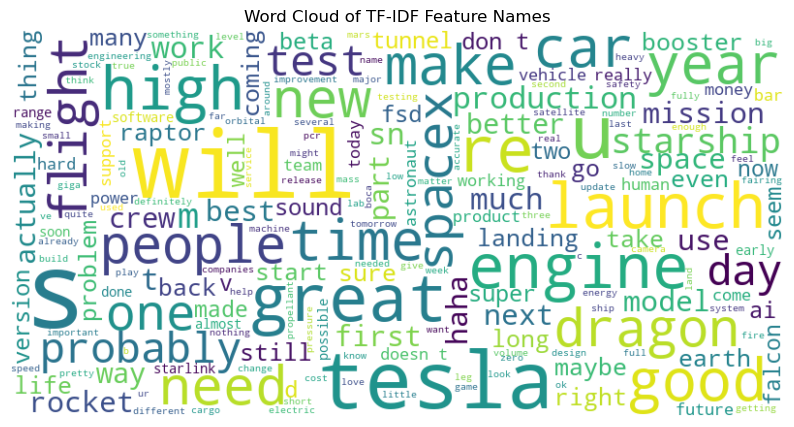

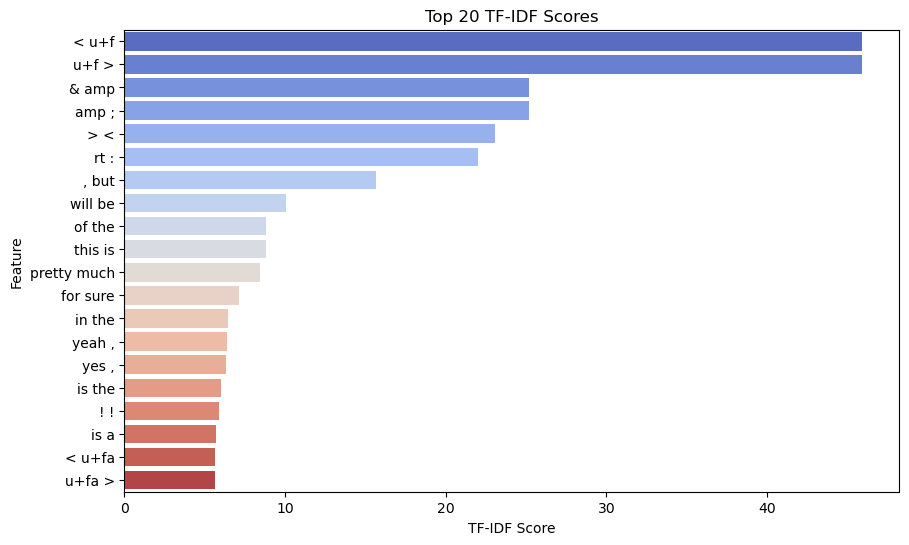

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt')
nltk.download('stopwords')


def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  
    tweet = re.sub(r'\@\w+|\#', '', tweet)  
    tweet = re.sub(r'\d+', '', tweet)  
    tweet = tweet.lower()  
    tweet = tweet.strip()  
    return tweet


df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\text mining\Elon_musk.csv", encoding='latin1')


df['cleaned_tweets'] = df['Text'].apply(preprocess_tweet)


def tokenize_with_ngrams(tweet, n=1):
    tokens = word_tokenize(tweet)
    ngrams = [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
    return ngrams

df['ngram_tweets'] = df['cleaned_tweets'].apply(lambda tweet: tokenize_with_ngrams(tweet, n=2))  


tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf.fit_transform(df['ngram_tweets'])


feature_names = tfidf.get_feature_names_out()


tfidf_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(' '.join(feature_names))

plt.figure(figsize=(10, 7))
plt.imshow(tfidf_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of TF-IDF Feature Names')
plt.show()


def visualize_top_tfidf(tfidf_matrix, feature_names, n=10):
    scores = np.sum(tfidf_matrix, axis=0).A1
    top_idxs = np.argsort(scores)[::-1][:n]
    top_features = [(feature_names[i], scores[i]) for i in top_idxs]
    top_features_df = pd.DataFrame(top_features, columns=['Feature', 'TF-IDF Score'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TF-IDF Score', y='Feature', data=top_features_df, palette='coolwarm')
    plt.title(f'Top {n} TF-IDF Scores')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Feature')
    plt.show()

visualize_top_tfidf(tfidf_matrix, feature_names, n=20)